Xicheng XIA

# Multi-Period Asset Pricing

Suppose that consumption growth has a lognormal distribution with the possibility of rare disasters:
$$
ln\widetilde{g}=0.02+0.02\widetilde{\epsilon}+\widetilde{\nu}
$$
Here epsilon is a standard normal random variable, while nu is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%). Simulate epsilon with 10,000 random draws from a standard normal distribution, and simulate nu with 10,000 random draws from a standard uniform distribution (i.e., over the interval [0,1]). 

## Part 1: Hansen–Jagannathan Bound
Use the simulated distribution of consumption growth to calculate the pricing kernel for power utility:
$$
\widetilde{M}=0.99\widetilde{g}−\gamma
$$

for gamma in the range [1,4]. Calculate the mean and standard deviation of the pricing kernel for all values of gamma. Plot the ratio SD(M)/E(M) (on the y axis) vs gamma (on the x axis). Take note of the smallest value of gamma for which SD(M)/E(M) > 0.4 (i.e., for which the Hansen–Jagannathan bound is satisfied). Briefly explain the economic significance of this result.

## Part 2: Price-Dividend Ratio

Use the simulated distribution of consumption growth to find the (constant) price-dividend ratio for the next-period equity claim, for gamma in the range [1, 7]:
$$
\frac{P_1}{D}=\mathbb{E}\left[0.99\widetilde{g}^{1−\gamma}\right]
$$
Plot $P_1/D$ (on the y axis) vs gamma (on the x axis).

## Part 3: Equity Premium

Use the simulated distribution of consumption growth to find the expected market return, for gamma in the range [1, 7]:
$$
\mathbb{E}\left[\widetilde{R}_m\right]=\frac{D}{P_1}\mathbb{E}\left[\widetilde{g}\right]
$$
Use the simulated distribution of consumption growth to find the risk-free rate, for gamma in the range [1,7]:
$$
R_f=\frac{1}{\mathbb{E}\left[0.99\widetilde{g}^{−\gamma}\right]}
$$
Plot the equity premium (on the y axis) vs gamma (on the x axis).

Please submit your results (including graphs and qualitative discussion of economic significance) and programming code to the submission folder for Homework 4 before the start of the lecture on Wednesday, 21 November.

Economic Significance:

*    For investor with power utility, volatility of pricing kernel depends on gamma, which is investor's (constant) coefficient of relative aversion.

*    H–J bound sets lower bound on volatility of pricing kernel, which becomes lower bound on investor's coefficient of relative risk aversion.

*    Rare disasters make consumption growth more risky (by introducing substantial amount of downside risk), so investor demands larger risk premium for given level of relative risk aversion.

*    H–J bound is satisfied for reasonably low levels of relative risk aversion, so no equity premium puzzle.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.optimize as optimize

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.facecolor'] = '1.'

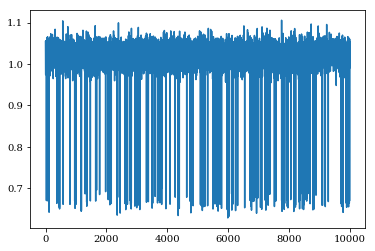

In [3]:
np.random.seed(1)

# Generate nu from a noraml distribution
epsilon = np.random.randn(10000, 1)

# Generate nu that has value of zero (with probability of 98.3%) 
# and ln(0.65) (with probability of 1.7%)

#nu = np.random.choice(a = [0, np.log(0.65)], 
#                     size = (10000, 1), 
 #                    p = [98.3/100, 1.7/100])

nu = np.random.rand(10000, 1)

ind = nu < 0.983
nu[ind] = 0

ind = nu >= 0.983
nu[ind] = np.log(0.65) 


# simulate lng
lng = 0.02 + 0.02*epsilon + nu
g = np.exp(lng)

plt.plot(g)
plt.show()

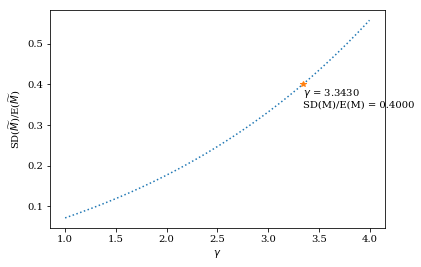

In [4]:
gamma = np.arange(1, 4, 0.001)

M = 0.99 * g**(-gamma)

hj_b= (M.std(axis = 0)/M.mean(axis = 0) ).reshape(gamma.shape)

ind = np.where(hj_b == hj_b[hj_b > 0.4][0] )

plt.plot(gamma, hj_b,':')
plt.plot(gamma[ind], hj_b[ind], '*')
plt.text(gamma[ind], hj_b[ind], 
         '$\gamma$ = %.4f \nSD(M)/E(M) = %.4f'%( gamma[ind], hj_b[ind]),
        verticalalignment='top')
plt.xlabel('$\gamma$')
plt.ylabel('SD($\\widetilde{M}$)/E($\\widetilde{M}$)')
plt.show()

* The ratio of the standard deviation of a stochastic discount factor ($\tilde{M}$) to its mean exceeds the Sharpe Ratio attained by anyportfolio.

* The higher the $\gamma$ is, the more the investor risk averse, the lower variance they require for the same asset return.

* For those who have a risk averse level of 3.3430, the sharpe ratio requiremnet for they investment is 0.4


* Is the lower bound of volatility pricing kernel, the sharpe ratio for portfolio that has a highest sharpe ratio.

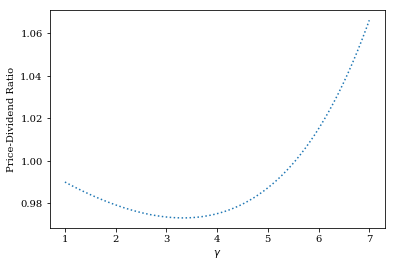

In [5]:
gamma = np.arange(1, 7, 0.001)

claim = ( 0.99 * g**(1 - gamma) ).mean(0)

plt.plot(gamma, claim,':')
plt.xlabel('$\gamma$')
plt.ylabel('Price-Dividend Ratio')
plt.show()

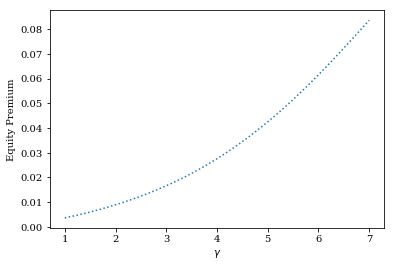

In [6]:
gamma = np.arange(1, 7, 0.001)
M = 0.99 * g**(-gamma)
rm = 1/claim*g.mean()
rf = 1/M.mean(axis = 0) 
plt.plot(gamma, rm- rf,':')
plt.xlabel('$\gamma$')
plt.ylabel('Equity Premium')
plt.show()